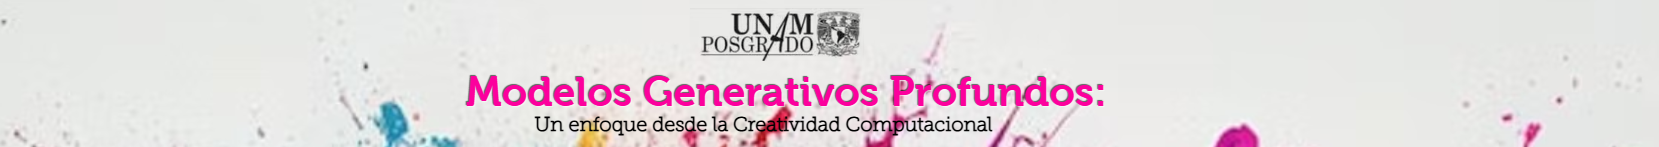

# Perceptrón Multicapa (MLP) para clasificación de imágenes

En esta libreta aprenderemos los pasos para implementar un clasificador (discriminador) de imágenes (las del conjunto de datos CIFAR-10), usando un perceptrón multicapa y Keras.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
sys.path.append("/content/drive/My Drive/Colab Notebooks/CursoIAGenerativa")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, optimizers, utils, datasets
from notebooks.utils import display

## 1. Preparar los datos

**1.1 Descargar el dataset**

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


**1.2 Escalar los valores de las imágenes**


**1.3 Codificar las etiquetas con one-hot-encoding.**


Veamos las primeras 10 imágenes del conjunto de entrenamiento junto con sus etiquetas codificadas usando one-hot encoding.

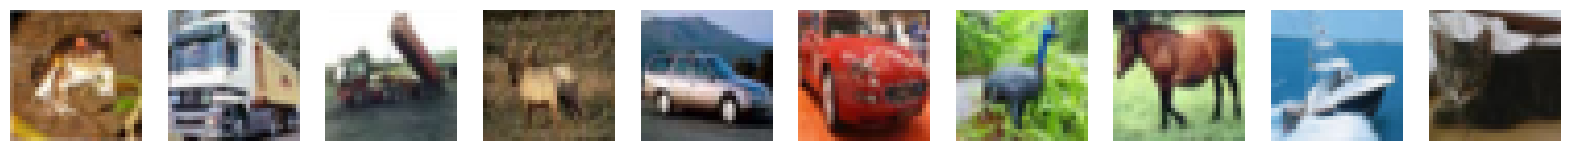

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


## 2. Construir el modelo <a name="build"></a>

Podemos utilizar el método <b>model.summary()</b> para inspeccionar la forma de la red en cada capa.

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 32, 32, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3072)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 200)            │       614,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 150)            │        30,150 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │         1,510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 646,260 (2.47 MB)

 Trainable params: 646,260 (2.47 MB)

 Non-trainable params: 0 (0.00 B)

## 3. Compilar el modelo <a name="compile"></a>

En este paso, compilamos el modelo con un optimizador y una función de pérdida. También pasamos al método compile del modelo un parámetro metrics donde podemos especificar cualquier métrica adicional que nos gustaría reportar durante el entrenamiento, como el accuracy.

## 4. Entrenar el modelo <a name="train"></a>

Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 10ms/step - accuracy: 0.2902 - loss: 1.9560
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.3941 - loss: 1.6942
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4243 - loss: 1.6072
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.4538 - loss: 1.5402
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.4637 - loss: 1.5067
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.4749 - loss: 1.4709
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.4913 - loss: 1.4302
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5008 - loss: 1.4080
Epoch 9/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.5061 - loss: 1.3909
Epoch 10/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.5046 - loss: 1.3794


## 5. Evaluar el modelo

Hasta ahora sabemos que el modelo tiene un desempeño del 51.67% en el conjunto de entrenamiento, pero ¿cómo se desempeña con imágenes que no ha visto? Para contestar esta pregunta, podemos usar el método evaluate que provee Keras.

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4935 - loss: 1.4210


[1.4302641153335571, 0.48890000581741333]

La salida es una lista de las métricas que estamos monitoreando: entropía cruzada categórica y precisión. Podemos observar que la precisión del modelo es aún del 49.0% incluso en imágenes que nunca ha visto antes. Cabe destacar que, si el modelo adivinara al azar, lograría aproximadamente un 10% de precisión (porque hay 10 clases), por lo que un 49.0% es un buen resultado, considerando que hemos utilizado una red neuronal muy básica.

Podemos observar algunas de las predicciones en el conjunto de prueba utilizando el <b>método predict</b>: <br>
<b>1.- preds</b> es un arreglo de forma [10000, 10], es decir, un vector de 10 probabilidades de clase para cada observación. <br>
<b>2.-</b>Convertimos este arreglo de probabilidades en una única predicción utilizando la función argmax de numpy. Aquí, axis = -1 le indica a la función que colapse el arreglo sobre la última dimensión (la dimensión de las clases), de modo que la forma de preds_single sea entonces [10000, 1]. <br>
<b>3.-actual_single</b> contiene la etiqueta real esperada.

In [ ]:
CLASSES = np.array(
    [
        "airplane",
        "automobile",
        "bird",
        "cat",
        "deer",
        "dog",
        "frog",
        "horse",
        "ship",
        "truck",
    ]
)

preds = model.predict(x_test)
preds_single = CLASSES[np.argmax(preds, axis=-1)]
actual_single = CLASSES[np.argmax(y_test, axis=-1)]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


Podemos visualizar algunas de las imágenes junto con sus etiquetas y predicciones utilizando el siguiente código:

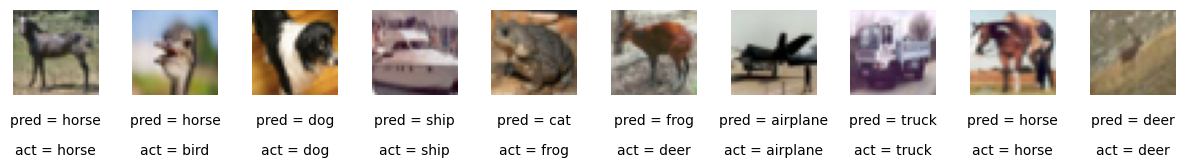

In [ ]:
n_to_show = 10
indices = np.random.choice(range(len(x_test)), n_to_show)

fig = plt.figure(figsize=(15, 3))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for i, idx in enumerate(indices):
    img = x_test[idx]
    ax = fig.add_subplot(1, n_to_show, i + 1)
    ax.axis("off")
    ax.text(
        0.5,
        -0.35,
        "pred = " + str(preds_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.text(
        0.5,
        -0.7,
        "act = " + str(actual_single[idx]),
        fontsize=10,
        ha="center",
        transform=ax.transAxes,
    )
    ax.imshow(img)

Como se esperaría, alrededor del 50% son correctas.